In [65]:
import numpy as np
import matplotlib.pyplot as plt
scale = 133.322

In [43]:
data_he = np.loadtxt("../data/Helium1.txt", skiprows=1)
data_lu = np.loadtxt("../data/Luft1.txt", skiprows=1)

In [66]:
import uncertainties as un
def nr2str(number, uncert):
    u = un.ufloat(number, uncert)
    return "(" + '{:.1u}'.format(u).replace("+/-", "\\pm") + ")"

print(nr2str(10.3427384, 0.0065454))

(10.343\pm0.007)


In [56]:
def plot_membran(data, label):
    baratron = data[:, 0] * scale
    membran = data[:, 1] * scale
    fit_params, cov = np.polyfit(baratron, membran, 1, cov=True)
    error = (np.sqrt(np.diag(cov)))
    fit_function = np.poly1d(fit_params)
    ts = np.linspace(np.min(baratron), np.max(baratron), 1000)
    ax.scatter(baratron, membran, label=label)

    ax.plot(ts, fit_function(ts), label = f"$P_\\mathrm{{Membran}}(P_\\mathrm{{Bara}}) = P_\\mathrm{{Bara}} \\cdot {nr2str(fit_params[0], error[0])} + {nr2str(fit_params[1], error[1])} \\mathrm{{Pa}}$")

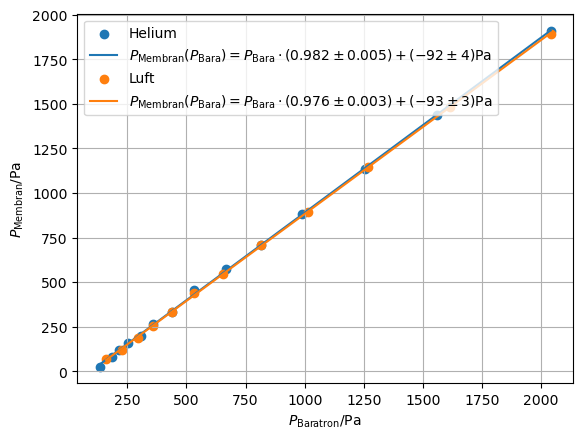

In [58]:

fig, ax = plt.subplots()
plot_membran(data_he, label='Helium')
plot_membran(data_lu, label='Luft')
ax.set(xlabel="$P_\\mathrm{Baratron} / \\mathrm{Pa}$", ylabel="$P_\\mathrm{Membran} / \\mathrm{Pa}$")
ax.legend()
ax.grid()

fig.savefig('../out/membran.png')

In [6]:
data2_he =  np.genfromtxt("../data/Helium3.txt", skip_header=1, delimiter="\t")
data2_lu =  np.genfromtxt("../data/Luft3.txt", skip_header=1, delimiter="\t")

In [7]:
def plot_pirani(data, ax, label):
    baratron = data[:, 3] * scale
    pirani = data[:, 5]
    ax.scatter(baratron, pirani, label=label)

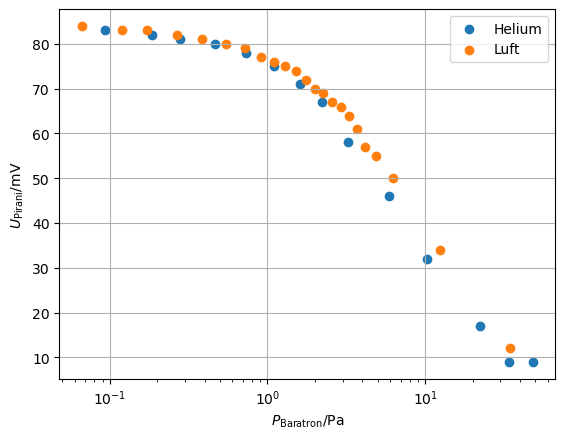

In [8]:
fig2, ax2 = plt.subplots()
plot_pirani(data2_he, ax2, "Helium")
plot_pirani(data2_lu, ax2, "Luft")
ax2.set(xscale="log", xlabel="$P_\\mathrm{Baratron} / \\mathrm{Pa}$", ylabel = "$U_\\mathrm{Pirani} / \\mathrm{mV}$")
ax2.legend()
ax2.grid()
fig2.savefig('../out/pirani.png')

In [67]:
def plot_penning(data, ax, label):
    penning_raw = data[:, 4] * 10
    baratron = data[:, 3][~np.isnan(penning_raw)] * scale
    penning = penning_raw[~np.isnan(penning_raw)]
    ax.scatter(baratron, penning, label=label)

    fit_params, cov = np.polyfit(baratron, penning, 1, cov=True)
    error = (np.sqrt(np.diag(cov)))



    fit_function = np.poly1d(fit_params)
    ts = np.linspace(np.min(baratron), np.max(baratron), 1000)
    ax.plot(ts, fit_function(ts),
            label = f"$P_\\mathrm{{Pen}}(P_\\mathrm{{Bara}}) = P_\\mathrm{{Bara}} \\cdot {nr2str(fit_params[0], error[0])} + {nr2str(fit_params[1], error[1])}\\mathrm{{Pa}}$")

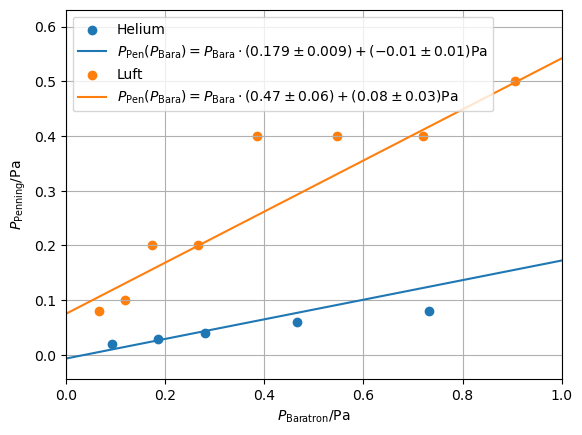

In [68]:
fig3, ax3 = plt.subplots()
plot_penning(data2_he, ax3, "Helium")
plot_penning(data2_lu, ax3, "Luft")
ax3.set(xlabel="$P_\\mathrm{Baratron} / \\mathrm{Pa}$", ylabel = "$P_\\mathrm{Penning} / \\mathrm{Pa}$")
ax3.legend()
ax3.grid()
ax3.set(xlim=[0,1])

ax3.legend()

fig3.savefig('../out/penning.png')

In [69]:
def plot_ionivac(data, ax, label):
    ionivac_raw = data[:, 1] * 10
    baratron = data[:, 3][~np.isnan(ionivac_raw)] * scale
    ionivac = ionivac_raw[~np.isnan(ionivac_raw)]
    ax.scatter(baratron, ionivac, label=label)

    fit_params, cov = np.polyfit(baratron, ionivac, 1, cov=True)
    error = (np.sqrt(np.diag(cov)))
    fit_function = np.poly1d(fit_params)
    ts = np.linspace(np.min(baratron), np.max(baratron), 1000)
    print(f"{label}: {fit_params}")
    ax.plot(ts, fit_function(ts), label = f"$P_\\mathrm{{Ion}}(P_\\mathrm{{Bara}}) = P_\\mathrm{{Bara}} \\cdot {nr2str(fit_params[0], error[0])} + {nr2str(fit_params[1], error[1])}\\mathrm{{Pa}}$")

Helium: [0.17262049 0.00461235]
Luft: [1.05800929 0.01716354]


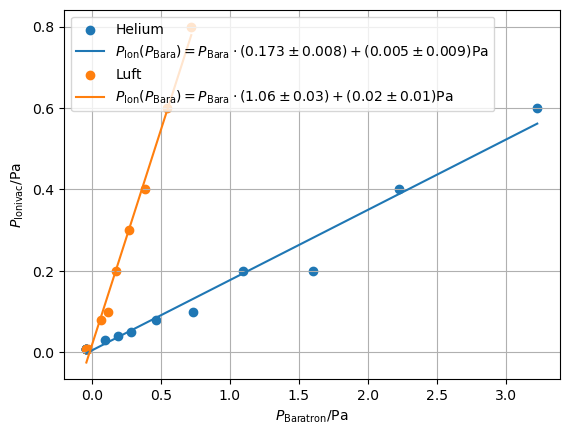

In [70]:
fig4, ax4 = plt.subplots()
plot_ionivac(data2_he, ax4, "Helium")
plot_ionivac(data2_lu, ax4, "Luft")
ax4.set(xlabel="$P_\\mathrm{Baratron} / \\mathrm{Pa}$", ylabel = "$P_\\mathrm{Ionivac} / \\mathrm{Pa}$")
ax4.legend()
ax4.grid()
#ax4.set(xlim=[0,1])
fig4.savefig('../out/ionivac.png')